In [213]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

pd.set_option("display.max_columns", None)

In [23]:
DATA_PATH = "./wiki_pageviews_covid-master/data/"

# Interventions

This dataset contains a series of important dates associated with the pandemic for different countries.

We augment the dataset by adding columns that represent how long it took for measures to be imposed after the first case, and how long the abnormal mobility period lasted for. These values can tell us how quick governments were to respond and how long they imposed measures for.

In [143]:
interventions = pd.read_csv(DATA_PATH + "interventions.csv", index_col="lang")

# Convert columns to datetime
interventions = interventions.apply(pd.to_datetime)

# Period between date of 1st case and date of first imposed measure
interventions["Response time"] = (
    interventions[["School closure", "Public events banned", "Lockdown"]].min(axis=1)
    - interventions["1st case"]
)

# Duration of abnormal mobility
interventions["Reduced mobility"] = (
    interventions["Normalcy"] - interventions["Mobility"]
)

interventions

,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy,Response time,Reduced mobility
lang,,,,,,,,,
fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02,49 days,108 days
da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05,14 days,86 days
de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10,47 days,116 days
it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26,34 days,107 days
nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaT,2020-03-16,2020-05-29,13 days,74 days
no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04,15 days,85 days
sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02,9 days,47 days
sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaT,2020-03-11,2020-06-05,41 days,86 days
ko,2020-01-20,2020-02-20,2020-02-23,NaT,NaT,2020-02-25,2020-04-15,34 days,50 days


Except for English, we make the assumption that each language corresponds to the country in which the language is predominantly spoken. In some cases, this is obvious (`no` refers to Norway). In other cases, we take the country of origin of the language (`fr` refers to France).

Intervention dates for Spain are represented by Catalan (`ca`) as Catalan is predominantly spoken in regions of Spain.

# Google Mobility Data

In [134]:
mobility_data = pd.read_csv(
    DATA_PATH + "Global_Mobility_Report.csv.gz", parse_dates=["date"], low_memory=False,
)

mobility_data.head(20)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
5,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-20,-2.0,1.0,6.0,1.0,1.0,1.0
6,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-21,-3.0,2.0,6.0,0.0,-1.0,1.0
7,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-22,-2.0,2.0,4.0,-2.0,3.0,1.0
8,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-23,-1.0,3.0,3.0,-1.0,4.0,1.0
9,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-24,-3.0,0.0,5.0,-1.0,3.0,1.0


We will need to decide which columns are useful and which are not when deciding which columns to set as the index columns.

In [26]:
# Get earliest and latest data entries
earliest_date = mobility_data.date.min(axis=0).date().strftime("%Y-%m-%d")
latest_date = mobility_data.date.max(axis=0).date().strftime("%Y-%m-%d")

print(f"Data from {earliest_date} to {latest_date}")

Data from 2020-02-15 to 2020-08-25


# Apple Mobility Data

In [27]:
transport_data = pd.read_csv(DATA_PATH + "applemobilitytrends-2020-04-20.csv.gz")

transport_data.head()

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,129.41,102.24,88.09,88.17,94.48,100.62,111.02,113.50,86.95,83.01,85.44,82.73,89.70,95.48,100.43,89.25,91.02,89.72,94.87,102.82,109.92,110.07,79.68,68.24,51.77,43.79,24.99,24.61,30.93,24.69,24.95,24.65,24.50,26.31,20.39,19.29,22.62,21.61,21.98,23.07,23.94,19.49,21.78,23.66,25.11,25.02,25.20,24.11,20.54,22.54,26.40,26.03,26.43,26.70,26.32,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,84.52,96.63,87.38,81.49,87.21,93.52,94.50,74.80,87.25,81.41,77.78,74.50,81.19,87.97,78.42,94.88,95.65,91.13,94.46,103.80,92.92,82.47,87.25,63.37,46.70,37.87,31.43,37.78,37.44,35.95,30.87,33.56,36.84,32.62,27.12,22.64,25.93,25.88,25.42,23.03,28.27,24.69,20.26,22.90,25.93,23.50,26.65,27.76,24.90,23.92,31.13,25.80,29.81,28.96,27.29,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,88.20,92.28,98.15,98.96,104.71,132.57,141.76,108.21,107.92,99.51,96.38,97.96,116.77,117.72,81.13,86.76,88.90,92.74,97.45,118.32,122.78,80.36,89.28,89.29,82.73,86.67,98.75,84.77,47.70,53.57,45.44,43.21,43.90,16.77,12.54,8.74,10.08,10.76,14.86,14.58,15.45,13.34,9.92,14.59,12.65,15.79,16.48,17.15,15.13,11.53,17.24,18.55,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,69.12,93.42,111.49,107.02,111.36,124.13,120.44,100.50,96.60,82.59,107.79,110.62,124.18,108.49,68.50,101.01,104.39,108.23,113.92,126.70,112.81,70.94,109.38,109.62,83.06,106.85,104.31,70.31,43.64,51.55,35.57,31.96,29.97,11.75,9.11,6.96,8.36,8.05,10.92,10.53,11.30,10.73,7.77,11.37,9.79,11.78,11.23,12.44,10.97,9.12,11.85,13.49,15.51,14.65,13.58,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,98.27,101.79,105.38,107.29,113.37

`Data from 2020-01-13 to 2020-04-20`

The data is stored in a wide format. We can unpivot the dataframe in order to obtain one that more closely resembles the format of the Google mobility data.

In [28]:
# Convert dataframe from wide to long format
transport_data = transport_data.melt(
    id_vars=["region", "transportation_type"],
    value_vars=transport_data.columns[3:],
    var_name="date",
    value_name="percent_from_baseline",
)

# Set index columns
transport_data = transport_data.set_index(
    ["region", "transportation_type", "date"]
).sort_index()

transport_data.head()

percent_from_baseline
region  transportation_type date                             
Albania driving             2020-01-13                 100.00
                            2020-01-14                  95.30
                            2020-01-15                 101.43
                            2020-01-16                  97.20
                            2020-01-17                 103.55

We can now easily extract ready-to-use time series from the data.

In [29]:
# Select time series for driving data in Norway
transport_data.loc["Norway", "driving"]

,percent_from_baseline
date,
2020-01-13,100.00
2020-01-14,98.43
2020-01-15,102.34
2020-01-16,105.02
2020-01-17,122.49
...,...
2020-04-16,81.25
2020-04-17,87.04
2020-04-18,84.42


# Wikipedia Page Topics

This dataset contains, for each Wikipedia page in the set, the topics that are linked to it.

In [30]:
topics_linked = pd.read_csv(DATA_PATH + "topics_linked.csv.xz", index_col="index")

topics_linked.head()

,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,STEM.STEM*,Culture.Performing arts,Culture.Literature,History and Society.Politics and government,Geography.Regions.Africa.Northern Africa,STEM.Earth and environment,Geography.Regions.Africa.Central Africa,STEM.Medicine & Health,STEM.Libraries & Information,Geography.Regions.Europe.Europe*,Geography.Regions.Europe.Western Europe,Culture.Media.Radio,STEM.Space,Culture.Visual arts.Comics and Anime,STEM.Technology,Culture.Internet culture,Culture.Media.Software,Geography.Regions.Asia.East Asia,Geography.Regions.Europe.Southern Europe,STEM.Biology,Culture.Food and drink,History and Society.Business and economics,Culture.Visual arts.Fashion,Geography.Regions.Americas.Central America,Geography.Geographical,Geography.Regions.Oceania,STEM.Physics,Culture.Media.Films,Geography.Regions.Asia.South Asia,History and Society.Transportation,History and Society.History,Geography.Regions.Africa.Western Africa,Culture.Media.Media*,Geography.Regions.Americas.South America,Culture.Linguistics,STEM.Computing,Culture.Biography.Biography*,Culture.Philosophy and religion,Culture.Sports,Geography.Regions.Africa.Southern Africa,Culture.Visual arts.Visual arts*,Geography.Regions.Africa.Eastern Africa,History and Society.Society,STEM.Engineering,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rosmalen,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q2001490
Commelinales,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q290349
Transport_in_Honduras,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q1130638
QuakeC,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q2122062
Food_writing,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q5465542


We can find the topics linked to the Wikipedia pages of important politicians during the COVID-19 pandemic. For example, we can find which topics are linked to Erna Solberg - Norway's prime minister during the pandemic.

In [31]:
topics_linked.loc[topics_linked.index == "Erna_Solberg"]

,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,STEM.STEM*,Culture.Performing arts,Culture.Literature,History and Society.Politics and government,Geography.Regions.Africa.Northern Africa,STEM.Earth and environment,Geography.Regions.Africa.Central Africa,STEM.Medicine & Health,STEM.Libraries & Information,Geography.Regions.Europe.Europe*,Geography.Regions.Europe.Western Europe,Culture.Media.Radio,STEM.Space,Culture.Visual arts.Comics and Anime,STEM.Technology,Culture.Internet culture,Culture.Media.Software,Geography.Regions.Asia.East Asia,Geography.Regions.Europe.Southern Europe,STEM.Biology,Culture.Food and drink,History and Society.Business and economics,Culture.Visual arts.Fashion,Geography.Regions.Americas.Central America,Geography.Geographical,Geography.Regions.Oceania,STEM.Physics,Culture.Media.Films,Geography.Regions.Asia.South Asia,History and Society.Transportation,History and Society.History,Geography.Regions.Africa.Western Africa,Culture.Media.Media*,Geography.Regions.Americas.South America,Culture.Linguistics,STEM.Computing,Culture.Biography.Biography*,Culture.Philosophy and religion,Culture.Sports,Geography.Regions.Africa.Southern Africa,Culture.Visual arts.Visual arts*,Geography.Regions.Africa.Eastern Africa,History and Society.Society,STEM.Engineering,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Erna_Solberg,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Q291644


The topics linked to Erna Solberg are: `Culture.Biography.Women`, `History and Society.Politics and government`, `Geography.Regions.Europe.Europe*`, `Culture.Biography.Biography*`, and `Geography.Regions.Europe.Northern Europe`.

The topics of interest here are `History and Society.Politics and government` and `Geography.Regions.Europe.Northern Europe`.

By looking at the pageview counts of pages relating to `History and Society.Politics and government`, we should be able see how interest in the political sphere changes with time.

Continuing our example, we can also look at the topics linked to the Wikipedia page of Høyre - the party headed by Solberg during the pandemic.

In [32]:
topics_linked.loc[topics_linked.index == "Conservative_Party_(Norway)"]

,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,STEM.STEM*,Culture.Performing arts,Culture.Literature,History and Society.Politics and government,Geography.Regions.Africa.Northern Africa,STEM.Earth and environment,Geography.Regions.Africa.Central Africa,STEM.Medicine & Health,STEM.Libraries & Information,Geography.Regions.Europe.Europe*,Geography.Regions.Europe.Western Europe,Culture.Media.Radio,STEM.Space,Culture.Visual arts.Comics and Anime,STEM.Technology,Culture.Internet culture,Culture.Media.Software,Geography.Regions.Asia.East Asia,Geography.Regions.Europe.Southern Europe,STEM.Biology,Culture.Food and drink,History and Society.Business and economics,Culture.Visual arts.Fashion,Geography.Regions.Americas.Central America,Geography.Geographical,Geography.Regions.Oceania,STEM.Physics,Culture.Media.Films,Geography.Regions.Asia.South Asia,History and Society.Transportation,History and Society.History,Geography.Regions.Africa.Western Africa,Culture.Media.Media*,Geography.Regions.Americas.South America,Culture.Linguistics,STEM.Computing,Culture.Biography.Biography*,Culture.Philosophy and religion,Culture.Sports,Geography.Regions.Africa.Southern Africa,Culture.Visual arts.Visual arts*,Geography.Regions.Africa.Eastern Africa,History and Society.Society,STEM.Engineering,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Conservative_Party_(Norway),False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Q586364


We see that the only linked topics are: `History and Society.Politics and government`, `Geography.Regions.Europe.Europe*`, and `Geography.Regions.Europe.Northern Europe`.

In addition, we can see that we can group our countries of interest into geographic groups. Our countries of interest are: Denmark, Finland, France, Germany, Italy, Japan, Netherlands, Norway, Serbia, South Korea, Spain, and Sweden. By looking at the linked topics of the Wikipedia pages of each country, we can see in which group each country is in. This could be useful later on in case we wish to compare how countries within groups act.

In [33]:
from collections import defaultdict

In [34]:
countries = [
    "Denmark",
    "Finland",
    "France",
    "Germany",
    "Italy",
    "Japan",
    "Netherlands",
    "Norway",
    "Serbia",
    "South_Korea",
    "Spain",
    "Sweden",
]

regions = [
    "Geography.Regions.Europe.Northern Europe",
    "Geography.Regions.Europe.Western Europe",
    "Geography.Regions.Europe.Southern Europe",
    "Geography.Regions.Asia.East Asia",
]

In [35]:
# Group countries into regions
groups = defaultdict(list)

for region in regions:
    for country in countries:
        # Check if regional topic is True
        if topics_linked.loc[topics_linked.index == country][region].values[0]:
            groups[region].append(country)

for group, country_list in groups.items():
    print(f"{group} - {country_list}")

Geography.Regions.Europe.Northern Europe - ['Denmark', 'Finland', 'Norway', 'Sweden']
Geography.Regions.Europe.Western Europe - ['France', 'Germany', 'Netherlands']
Geography.Regions.Europe.Southern Europe - ['Italy', 'Serbia', 'Spain']
Geography.Regions.Asia.East Asia - ['Japan', 'South_Korea']


# Aggregated Time Series of Wikipedia Pageviews

This dataset contains the aggregated time series of Wikipedia pageviews per topic for different languages.

In [36]:
pageviews = pd.read_json(DATA_PATH + "aggregated_timeseries.json.gz")

pageviews

,ja.m,it,da.m,tr,no.m,en,sr,tr.m,en.m,no,sv,nl.m,nl,da,de,fr.m,ca.m,de.m,ko.m,fi.m,sr.m,ja,fr,fi,ca,it.m,sv.m,ko
len,1197788,1594039,256451,346007,516838,6047509,632128,345790,6045654,531478,3735720,1621578,2003807,258063,2415136,2188967,610575,2407385,489181,480638,396063,1197856,2195949,481854,642031,1588312,1959446,490314
sum,"{'2018-01-01 00:00:00': 22328288, '2018-01-02 ...","{'2018-01-01 00:00:00': 3338750, '2018-01-02 0...","{'2018-01-01 00:00:00': 765123, '2018-01-02 00...","{'2018-01-01 00:00:00': 407629, '2018-01-02 00...","{'2018-01-01 00:00:00': 715031, '2018-01-02 00...","{'2018-01-01 00:00:00': 86763830, '2018-01-02 ...","{'2018-01-01 00:00:00': 192409, '2018-01-02 00...","{'2018-01-01 00:00:00': 493684, '2018-01-02 00...","{'2018-01-01 00:00:00': 135822131, '2018-01-02...","{'2018-01-01 00:00:00': 224417, '2018-01-02 00...","{'2018-01-01 00:00:00': 0, '2018-01-02 00:00:0...","{'2018-01-01 00:00:00': 3331046, '2018-01-02 0...","{'2018-01-01 00:00:00': 1199379, '2018-01-02 0...","{'2018-01-01 00:00:00': 206514, '2018-01-02 00...","{'2018-01-01 00:00:00': 9287425, '2018-01-02 0...","{'2018-01-01 00:00:00': 13167585, '2018-01-02 ...","{'2018-01-01 00:00:00': 169499, '2018-01-02 00...","{'2018-01-01 00:00:00': 20345709, '2018-01-02 ...","{'2018-01-01 00:00:00': 1484496, '2018-01-02 0...","{'2018-01-01 00:00:00': 1319053, '2018-01-02 0...","{'2018-01-01 00:00:00': 451383, '2018-01-02 00...","{'2018-01-01 00:00:00': 7828155, '2018-01-02 0...","{'2018-01-01 00:00:00': 6441009, '2018-01-02 0...","{'2018-01-01 00:00:00': 523135, '2018-01-02 00...","{'2018-01-01 00:00:00': 111910, '2018-01-02 00...","{'2018-01-01 00:00:00': 12856884, '2018-01-02 ...","{'2018-01-01 00:00:00': 2383474, '2018-01-02 0...","{'2018-01-01 00:00:00': 819174, '2018-01-02 00..."
covid,"{'len': 30, 'sum': {'2018-01-01 00:00:00': 55,...","{'len': 33, 'sum': {'2018-01-01 00:00:00': 50,...","{'len': 4, 'sum': {'2018-01-01 00:00:00': 0, '...","{'len': 64, 'sum': {'2018-01-01 00:00:00': 1, ...","{'len': 10, 'sum': {'2018-01-01 00:00:00': 7, ...","{'len': 306, 'sum': {'2018-01-01 00:00:00': 57...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 6, '...","{'len': 64, 'sum': {'2018-01-01 00:00:00': 3, ...","{'len': 306, 'sum': {'2018-01-01 00:00:00': 91...","{'len': 10, 'sum': {'2018-01-01 00:00:00': 2, ...","{'len': 8, 'sum': {'2018-01-01 00:00:00': 0, '...","{'len': 32, 'sum': {'2018-01-01 00:00:00': 19,...","{'len': 32, 'sum': {'2018-01-01 00:00:00': 12,...","{'len': 4, 'sum': {'2018-01-01 00:00:00': 1, '...","{'len': 77, 'sum': {'2018-01-01 00:00:00': 160...","{'len': 16, 'sum': {'2018-01-01 00:00:00': 116...","{'len': 49, 'sum': {'2018-01-01 00:00:00': 3, ...","{'len': 77, 'sum': {'2018-01-01 00:00:00': 233...","{'len': 113, 'sum': {'2018-01-01 00:00:00': 6,...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 0, '...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 11, ...","{'len': 30, 'sum': {'2018-01-01 00:00:00': 26,...","{'len': 16, 'sum': {'2018-01-01 00:00:00': 62,...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 2, '...","{'len': 49, 'sum': {'2018-01-01 00:00:00': 6, ...","{'len': 33, 'sum': {'2018-01-01 00:00:00': 139...","{'len': 8, 'sum': {'2018-01-01 00:00:00': 19, ...","{'len': 113, 'sum': {'2018-01-01 00:00:00': 3,..."
topics,{'Culture.Biography.Biography*': {'len': 14904...,{'Culture.Biography.Biography*': {'len': 29427...,{'Culture.Biography.Biography*': {'len': 57720...,{'Culture.Biography.Biography*': {'len': 70443...,{'Culture.Biography.Biography*': {'len': 11603...,{'Culture.Biography.Biography*': {'len': 14038...,{'Culture.Biography.Biography*': {'len': 37718...,{'Culture.Biography.Biography*': {'len': 70434...,{'Culture.Biography.Biography*': {'len': 14038...,{'Culture.Biography.Biography*': {'len': 11804...,{'Culture.Biography.Biography*': {'len': 14706...,{'Culture.Biography.Biography*': {'len': 15284...,{'Culture.Biography.Biography*': {'len': 15294...,{'Culture.Biography.Biography*': {'len': 58323...,{'Culture.Biography.Biography*': {'len': 366

As an example, we can look at an approximation of the interest in Norwegian politics in Norway by looking at the time series of the pageviews for pages relating to `History and Society.Politics and government` in Norwegian Wikipedia. At the same time, we could correlate this with the pageview time series of pages relating to `Geography.Regions.Europe.Northern Europe`.

In [37]:
# Pageviews of political pages in Norwegian
pageviews["no"]["topics"]["History and Society.Politics and government"]["sum"]

# Pageviews of Northern European pages in Norwegian
pageviews["no"]["topics"]["Geography.Regions.Europe.Northern Europe"]["sum"];

This data exists twice as Wikipedia pageviews on mobile devices are counted separately. We could therefore also look at combining the data.

In [38]:
def combine_views(lang, topic):
    """Combines the views from desktop and mobile Wikipedia pages for a given language and topic.

    Args:
        lang: language code (string)
        topic: page topic (string)

    Returns:
        Series of dates and topic pageviews
    """

    # Select desktop and mobile pageviews
    df1 = pageviews[lang]["topics"][topic]["sum"]
    df2 = pageviews[lang + ".m"]["topics"][topic]["sum"]

    # defaultdict in case pageview count for a specific day only appears in one series
    total_views = defaultdict(int, df1)

    # Combine pageviews
    for date, views in df2.items():
        total_views[date] += views
    
    # Convert to dataframe
    total_views = pd.DataFrame(total_views.items(), columns=["date", "pageviews"])

    # Extract date
    total_views["date"] = pd.to_datetime(total_views['date']).dt.date

    # Set index
    total_views = total_views.set_index("date")

    return total_views

In [39]:
combine_views("no", "History and Society.Politics and government")

,pageviews
date,
2018-01-01,40377
2018-01-02,45131
2018-01-03,52943
2018-01-04,56377
2018-01-05,51896
...,...
2020-07-27,34576
2020-07-28,35061
2020-07-29,34370


### Tiavina's Part ###
In this part, we will see population political sentiment through their actions. To do so, we are making some assumptions:
- Compliance with the measures taken is an indicator of the political confidence of the population in the government. Indeed, citizens follow the government's indications if they consider the political rigour adequate. On the contrary, if they disapprove, they try to defy the government by not respecting the required discipline. Thus, we will see this through the respect of the reduction of mobility. Suppose the reduction in mobility remains constant over time. In that case, a constant political sentiment could be concluded, while an increase in mobility could illustrate a distrust of the citizens against the government.  
- Access to information also accompanies this idea. We assume that a population that informs itself about the imposed regulations feels more involved and in agreement with the government. We will therefore see through the interest in each country's covid pages (by analysing the number of pageview over time). 



Nous pouvons assumer que le respect des mesures prises est un indicateur de la confiance politique accordée par la population au gouvernement. En effet, nous considérons qu'un citoyen suit les indications du gouvernement s'il considère que la rigueure politique est adéquate. Au contraire, s'il ne l'approuve pas, il tente de défier le pouvoir en ne respectant pas la discipline requise. 

Ainsi, nous allons voir à travers le respect de la réduction de la mobilité. Si la réduction de la mobilité reste constante au cours du temps, un sentiment politique constant pourrait être conclu tandis qu'une augmentation de la mobilité pourrait illustrer une défiance des citoyens contre le gouvernement.  

L'accès à l'information accompagne aussi cette idée. Nous assumons qu'une population qui s'informe sur les règlementations imposées se sent plus impliquée et en accords avec le gouvernement. Nous verrons donc à travers l'intérrêt porté sur les pages concernant le covid (en analysant le nombre de cliques au cours du temps) de chaque pays.

In [139]:
transport_data.head()

percent_from_baseline
region  transportation_type date                             
Albania driving             2020-01-13                 100.00
                            2020-01-14                  95.30
                            2020-01-15                 101.43
                            2020-01-16                  97.20
                            2020-01-17                 103.55

Let's take the example of Norway and see when the drop in transportation decrease with respect to the mobility intervention date.

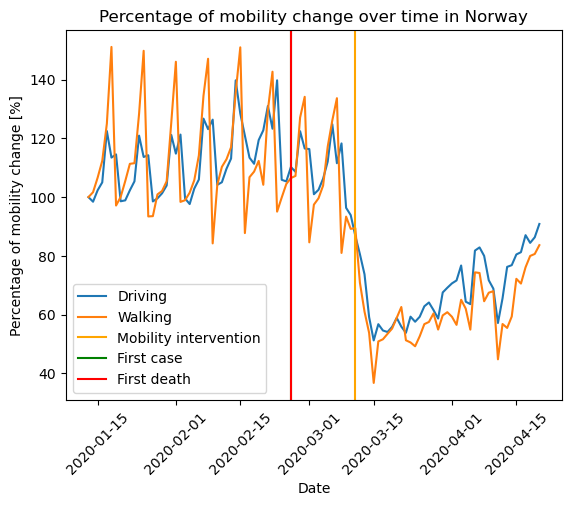

In [244]:
# Consult Norway transportation data
norway_data_transport_drive = transport_data.loc["Norway", "driving"]
norway_data_transport_walk = transport_data.loc["Norway", "walking"]
norway_data_transport = norway_data_transport_drive.merge(norway_data_transport_walk, on="date", suffixes=["_drive", "_walk"])
norway_data_transport.index = pd.to_datetime(norway_data_transport.index)

# Find Norway mobility reduction reglementation date
mobility_intervention_norway = datetime.date(interventions.loc["no"]["Mobility"])
first_case_norway = datetime.date(interventions.loc["no"]["1st case"])
first_death_norway = datetime.date(interventions.loc["no"]["1st death"])

# Plotting
plt.plot(norway_data_transport)
plt.title("Percentage of mobility change over time in Norway")
plt.xlabel("Date")
plt.ylabel("Percentage of mobility change [%]")
plt.axvline(x = mobility_intervention_norway, color = 'orange')
plt.axvline(x = first_case_norway, color = 'green')
plt.axvline(x = first_death_norway, color = 'red')
plt.legend(["Driving", "Walking", "Mobility intervention", "First case", "First death"], loc='lower left')
plt.xticks(rotation=45)
plt.show()

We can see here that the pecentage of mobility from baseline decrease very fast which can show that population is in agreement with the political decision when the restriction was imposed. However, since the percentage increases after, it can show that people respect less the restriction so it can illustrate the fact that they opposed the decision. 

Let's take another example: Serbia.

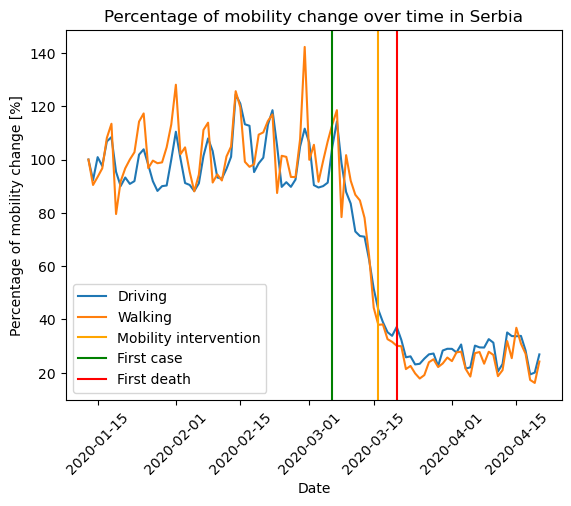

In [243]:
# Consult Norway transportation data
serbia_data_transport_drive = transport_data.loc["Serbia", "driving"]
serbia_data_transport_walk = transport_data.loc["Serbia", "walking"]
serbia_data_transport = serbia_data_transport_drive.merge(serbia_data_transport_walk, on="date", suffixes=["_drive", "_walk"])
serbia_data_transport.index = pd.to_datetime(serbia_data_transport.index)

# Find Norway mobility reduction reglementation date
mobility_intervention_serbia = datetime.date(interventions.loc["sr"]["Mobility"])
first_case_serbia = datetime.date(interventions.loc["sr"]["1st case"])
first_death_serbia = datetime.date(interventions.loc["sr"]["1st death"])

# Plotting
plt.plot(serbia_data_transport)
plt.title("Percentage of mobility change over time in Serbia")
plt.xlabel("Date")
plt.ylabel("Percentage of mobility change [%]")
plt.axvline(x = mobility_intervention_serbia, color = 'orange')
plt.axvline(x = first_case_serbia, color = 'g')
plt.axvline(x = first_death_serbia, color = 'red')
plt.legend(["Driving", "Walking", "Mobility intervention", "First case", "First death"], loc='lower left')
plt.xticks(rotation=45)
plt.show()

Here we can see that the population has already reduced the mobility before the government imposed the restriction. This can show a lack of trust in the politicians decisions. Moreover, we see that the percentage of mobility change stays constant. And since the population has decided to reduce mobility by themself, the constant percentage is not reflecting an agreement with the decision.

Now Let's focus on number of covid pages created and the corresponding pageviews

Number of distinct covid-related pages in Norway 10


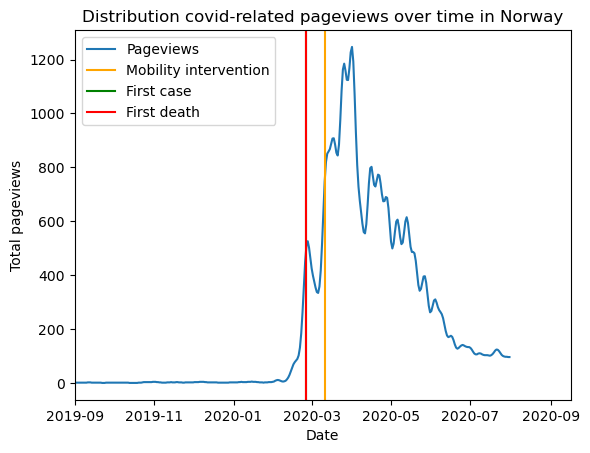

In [240]:
covid_pages_numb_no = pageviews["no"]["covid"]["len"]
print(f"Number of distinct covid-related pages in Norway {covid_pages_numb_no}")
covid_pages_view_no = pageviews["no"]["covid"]["sum"] # time-series
covid_pages_view_no = pd.DataFrame(covid_pages_view_no.items(), columns=['Date', 'PageView'])

# Change format of date
covid_pages_view_no['Date'] = pd.to_datetime(covid_pages_view_no['Date']).dt.date
covid_pages_norway = gaussian_filter1d(covid_pages_view_no["PageView"], sigma=2)


plt.plot(covid_pages_view_no['Date'], covid_pages_norway)
plt.title("Distribution covid-related pageviews over time in Norway")
plt.xlim(pd.to_datetime("2019-09")) 
plt.xlabel("Date")
plt.ylabel("Total pageviews")
plt.axvline(x = mobility_intervention_norway, color = 'orange')
plt.axvline(x = first_case_norway, color = 'green')
plt.axvline(x = first_death_norway, color = 'red')
plt.legend(["Pageviews", "Mobility intervention", "First case", "First death"], loc='upper left')
plt.show()


Number of distinct covid-related pages in Serbia 9


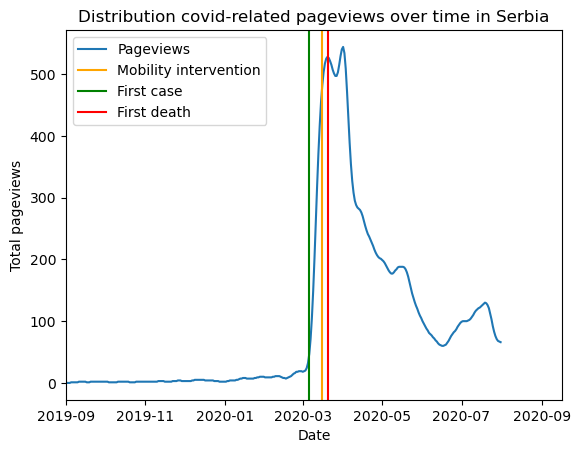

In [241]:
covid_pages_numb_sr = pageviews["sr"]["covid"]["len"]
print(f"Number of distinct covid-related pages in Serbia {covid_pages_numb_sr}")
covid_pages_view_sr = pageviews["sr"]["covid"]["sum"] # time-series
covid_pages_view_sr = pd.DataFrame(covid_pages_view_sr.items(), columns=['Date', 'PageView'])

# Set index columns
covid_pages_view_sr['Date'] = pd.to_datetime(covid_pages_view_sr['Date']).dt.date

covid_pages_serbia = gaussian_filter1d(covid_pages_view_sr["PageView"], sigma=3)

plt.plot(covid_pages_view_sr['Date'], covid_pages_serbia)
plt.title("Distribution covid-related pageviews over time in Serbia")
plt.xlabel("Date")
plt.ylabel("Total pageviews")
plt.xlim(pd.to_datetime("2019-09")) 
plt.axvline(x = mobility_intervention_serbia, color = 'orange')
plt.axvline(x = first_case_serbia, color = 'g')
plt.axvline(x = first_death_serbia, color = 'red')
plt.legend(["Pageviews", "Mobility intervention", "First case", "First death"], loc='upper left')
plt.show()
